### Quantum Cryptography - Day14
# Side Channel Simulation
In quantum Cryptography (especially QKD Protocol BB84) ,security is theoritically guarenteed by the laws of physics. However,**real -world implementation** introduced imperfection that attackers can exploit. The unintended information leak are known as **side channels**.

In this notebook ,we simulate comman side-channel behaviour to understand **how-practical attack aries**, how they *bias secrete key** and how they can be **dectected using statistical methods**.In this we will learn:
- What side channnel are and why they are matter in quantum cryptography 
- How detector biase create detectable exploits pattern
- How timing leakage can reveal the key information
- How to measure key bias statistically
- How to build  a side channel detection matrix
- How visualization help identify the hidden leak

## Import Required Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
import seaborn as sns

## Step 1 : Simulating Raw Quantum Key Generation
Befor studying the side chanels,we need a **baseline quantum key** that reprsents an ideal QKD system.
- Alice sends random bits (0 or 1)
- This represents a **perfect** qunatum channel with no evasdropping

This raw key will later be affectd by side-channel behaviours.

In [2]:
key_length=10000
raw_key=np.random.randint(0,2,key_length)
raw_key[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

## Step 2 : Detector Biase Simulation
In practical QKD systems ,detectors are nor **perfectly symmetric**
- one detector may be slightly more efficient than other
- This create a biase in detecting '0' and '1'

An attacker can exploit this bias to **guess key bits with higher probability**.we simulate:
- Detection for bit '1' has  higher detection probability
- Detection for bit '0' has lower detection probability

In [ ]:
detector_efficiency ={
    0:0.45, #detector for 0
    1:0.55 #detector for 1(bias)
}
detected_key=[]
for bit in raw_key:
    if np.random.rand()<detector_efficiency[bit]:
        detected_key.append(bit)
    
detected_key =np.array(detected_key)
len(detected_key)

4852

## Effect of Detector Bias
we compare distribution of bits **befor and after detection** to visualize bias.

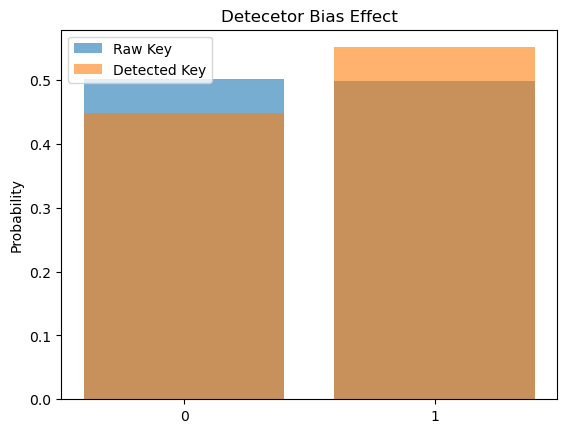

In [5]:
plt.Figure(figsize=(6,4))
plt.bar(['0','1'],[np.mean(raw_key==0),np.mean(raw_key==1)],alpha=0.6,label='Raw Key')
plt.bar(['0','1'],[np.mean(detected_key==0),np.mean(detected_key==1)],alpha=0.6,label='Detected Key')
plt.ylabel('Probability')
plt.title('Detecetor Bias Effect')
plt.legend()
plt.show()

## Step 3 : Timing Leakage Model
Even if key value are hidden **timing information** can laek secrets.
- Different detectors and electronic introduced different response times
- Attacker measure timing differencs to infer key bits

We simulates:
- Bit '0' has slightly faster detection time
- Bit '1' has slightly slower detection time
 

In [6]:
timing_0=np.random.normal(loc=10,scale=1,size=len(detected_key))
timing_1=np.random.normal(loc=12,scale=1,size=len(detected_key))
timing_data=np.where(detected_key==0,timing_0,timing_1)

## Visualizing Timing Leakage

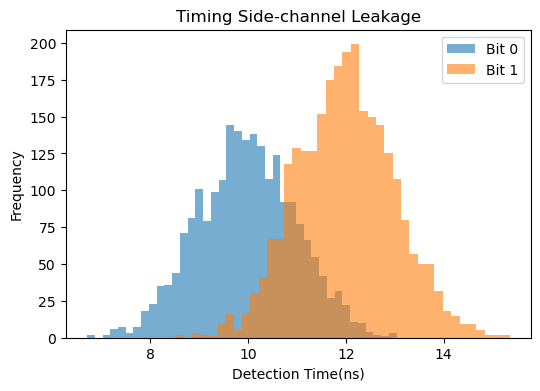

In [8]:
plt.figure(figsize=(6,4))
plt.hist(timing_data[detected_key==0],bins=40,alpha=0.6,label='Bit 0')
plt.hist(timing_data[detected_key==1],bins=40,alpha=0.6,label='Bit 1')
plt.xlabel('Detection Time(ns)')
plt.ylabel('Frequency')
plt.title('Timing Side-channel Leakage')
plt.legend()
plt.show()

## Key Bias Measurement
A secure QKD must be **Statistically Unbiased**.Any measurable bias:
- Reduce Entrophy 
- Weaken security
Indicates possible side-channel leakage

What we measure:
- Probability of 0 and 1
- Biae from ideal 50/50  distribution

In [9]:
p0=np.mean(detected_key==0)
p1=np.mean(detected_key==1)
bias=abs(p0-p1)
p0,p1,bias

(np.float64(0.4482687551525144),
 np.float64(0.5517312448474856),
 np.float64(0.10346248969497118))

#### Interpretation
- Ideal bias=0
- Higher bias mean more information leakage
- Attcaker can exploits this imbalance

## Step 5 : Side-Channel Detection Matrix
Insted of analysing each side channel independently .we combime feature into a **Detection Matrix**.This allows:
- Pattren Recognition
- Machine learning based detection
- System level security monitoring

#### Feature used:
- Bit value
- Detector Biase Indicator
- Timing Information

In [10]:
side_channel_matrix=np.column_stack([
    detected_key,
    timing_data,
    timing_data>np.mean(timing_data)
])
side_channel_matrix[:5]

array([[ 0.        , 10.41768141,  0.        ],
       [ 0.        , 10.09336519,  0.        ],
       [ 1.        , 11.94887821,  1.        ],
       [ 0.        , 10.00400126,  0.        ],
       [ 1.        , 11.29814161,  1.        ]])

## Visualizing the Detection Matrix

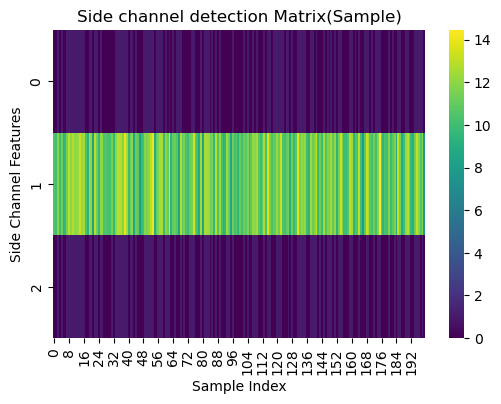

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(side_channel_matrix[:200].T,cmap='viridis',cbar=True)
plt.xlabel('Sample Index')
plt.ylabel('Side Channel Features')
plt.title('Side channel detection Matrix(Sample)')
plt.show()

#### Graph Interpretation :
- **X -axis(Sample index)** : Represents individual quantum detection events(key bit measurement) in time order.
- **Y-axis(Side channel features)** :  Represent different observalbale parameters related to side-channel leakage.
- **Row 0(Detected Key Bit)** : Shows thw actual measured secrete key bit (0 or 1) after quantum detection
- **Row 1(Timing Information)** : Shows detector response time associated with each key bit measurement
- **Row 2(Timing threashold flag)** : indicats whether the detection time is above the average ,acting as a leakage indicator.
- **Bright colors** : Represents higher numerical value(e.g bit=1 or longer detection time)
- **Dark colors** : Represents lower numerical value(e.g bit=0 or shorter detection time) 
- **vertical colour patterns** : Indicate correlation between physical leakage and secrete key bits.
- **Random looking pattern** : indicates minimal side channel leakage and better security.


## Why this matters?
Understanding ans simulating  side channel is critical for:
- Secure QKD Implementation
- Hardware aware cryptograhic design
- Defending against real world quantum attacks

This knowledge bridges the gap between **thory and practice** in qunatum security.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day14_Side_channel_simulation.ipynb

**Date created**: 07-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>